#### Study the dataset's meanIR, IRLbl and SCUMBLE metrics
Use the metrics implementet according Charte et al. -- which are used to implement undersampling and oversampling -- to get a better feeling for the label distribution.

In [1]:
import sys
sys.path.append('..')
import json
import help_functions as hf
import numpy as np
hf.setup_gpu(gpu_nr=1)

Using TensorFlow backend.


2 Physical GPUs, 1 Logical GPU


Use the test set for faster computations as its distribution follows the same distribution as the whole data.

In [2]:
with open('../training_configurations.json', 'r') as fp:
    config = json.load(fp)[str(112)]

test, _ = hf.get_flow(df_file='../' + config['data_folder'] + '/train_df.json.bz2',
                      nr_classes=config['nr_classes'],
                      batch_size=config['batch_size'],
                      image_dimension=config['image_dimension'])
y_true = hf.get_y_true(shape=(test.samples, len(test.class_indices)), classes=test.classes)

Found 773500 validated image filenames belonging to 31 classes.


Imbalance ratio per label (IRLbl)

In [3]:
IRLbl = hf.imbalance_ratio_per_label(y_true)
np.max(IRLbl)

94086.33333333333

In [4]:
np.median(IRLbl)

58.791710060404085

Ratio of positive samples

In [5]:
np.sum(y_true) / (y_true.shape[0] * y_true.shape[1])

0.05706812352732656

Mean imbalance ratio (meanIR)

In [6]:
meanIR = hf.mean_imbalance_ratio(y_true, class_names=test.class_indices)
print(f'Mean imbalance ratio (meanIR): {meanIR}')

Mean imbalance ratio (meanIR): (3907.9257696640116, {'Animals': 166.72, 'Architecture': 17.94, 'Art': 13.44, 'Belief': 18817.27, 'Chemistry': 317.86, 'Culture': 1.47, 'Diagrams': 146.7, 'Events': 6.96, 'Food': 4552.56, 'Fossils': 130.13, 'Geology': 68.18, 'History': 2.77, 'Landscapes': 88.04, 'Literature': 156.2, 'Logos & Symbols': 138.16, 'Maps & Flags': 25.35, 'Mathematics': 1493.43, 'Medicine & Health': 319.3, 'Monuments & Memorials': 209.86, 'Music': 58.79, 'Nature': 2.67, 'People': 1.64, 'Places': 1.0, 'Plants': 33.7, 'Politics': 6.73, 'STEM': 94086.33, 'Society': 1.17, 'Space': 252.47, 'Sports': 6.0, 'Technology & Engineering': 6.63, 'Transportation': 16.22})


SCUMBLE (Score of ConcUrrence among iMBalanced LabEls)

In [7]:
scumble_dataset, scumble_samples = hf.scumble(y_true)
print(scumble_dataset)

0.4326354825386076


Study the labels' entangleness/coherence (TODO: better visualization)

In [6]:
test.class_indices

{'Animals': 0,
 'Architecture': 1,
 'Art': 2,
 'Belief': 3,
 'Chemistry': 4,
 'Culture': 5,
 'Diagrams': 6,
 'Events': 7,
 'Food': 8,
 'Fossils': 9,
 'Geology': 10,
 'History': 11,
 'Landscapes': 12,
 'Literature': 13,
 'Logos & Symbols': 14,
 'Maps & Flags': 15,
 'Mathematics': 16,
 'Medicine & Health': 17,
 'Monuments & Memorials': 18,
 'Music': 19,
 'Nature': 20,
 'People': 21,
 'Places': 22,
 'Plants': 23,
 'Politics': 24,
 'STEM': 25,
 'Society': 26,
 'Space': 27,
 'Sports': 28,
 'Technology & Engineering': 29,
 'Transportation': 30}

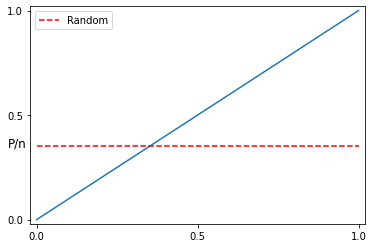

In [64]:
from matplotlib import pyplot as plt

plt.plot(np.linspace(0, 1), np.linspace(0, 1))
plt.plot(np.linspace(0, 1), np.repeat(0.35, repeats=50), '--r', label='Random')
plt.text(-0.09, 0.35, 'P/n', fontsize=12)
plt.xticks(np.arange(0, 1.5, step=0.5), np.arange(0, 1.5, step=0.5))
plt.yticks(np.arange(0, 1.5, step=0.5), np.arange(0, 1.5, step=0.5))
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.legend()